# Exploration du jeu de donnée Cardio_train avec l'algorithme Random Forest

L’algorithme des « forêts aléatoires » (ou Random Forest parfois aussi traduit par forêt d’arbres décisionnels) est un algorithme de classification qui réduit la variance des prévisions d’un arbre de décision seul, améliorant ainsi leurs performances. Pour cela, il combine de nombreux arbres de décisions dans une approche de type bagging.
Concrètement, chaque arbre de la forêt aléatoire est entrainé sur un sous ensemble aléatoire de données selon le principe du bagging, avec un sous ensemble aléatoire de features (caractéristiques variables des données) selon le principe des « projections aléatoires ».
Les prédictions sont ensuite moyennées lorsque les données sont quantitatives ou utilisés pour un vote pour des données qualitatives, dans le cas des arbres de classification.

*Loi des grands nombres* : 


## Aborder Random Forest 

In [109]:
#import des librairies utilisées
import nltk
import pandas as pd
import re
import numpy as np
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [12]:
#lectures des données et affichage des 5 premieres lignes
data = pd.read_csv('cardio_train.csv', sep=';')
df = data.copy()
df = df.drop('id', axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [13]:
df.shape
print("La forme de nos caractéristiques est de ",df.shape)

La forme de nos caractéristiques est de  (70000, 12)


In [14]:
#Ici je regarde si il existe des valeurs nulls dans chaque colonne
df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [15]:
#Identification desanomalies, nous pouvons rapidement calculer des statistiques récapitulatives.
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Il n'y a aucun point de données qui apparaît immédiatement comme anormal et aucun zéro dans aucune des colonnes. Nous pouvons continuer.

In [16]:
df ['cardio']. value_counts ()

0    35021
1    34979
Name: cardio, dtype: int64

/home/fatimam/anaconda3/envs/my_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x288 with 0 Axes>

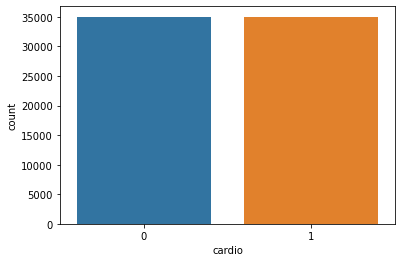

<Figure size 720x288 with 0 Axes>

In [17]:
sns.countplot (df ['cardio'])
plt.figure(figsize=(10,4))

Les données sont homogènes, On a le même nombre dans le dataset de personnes malades ou pas malade.

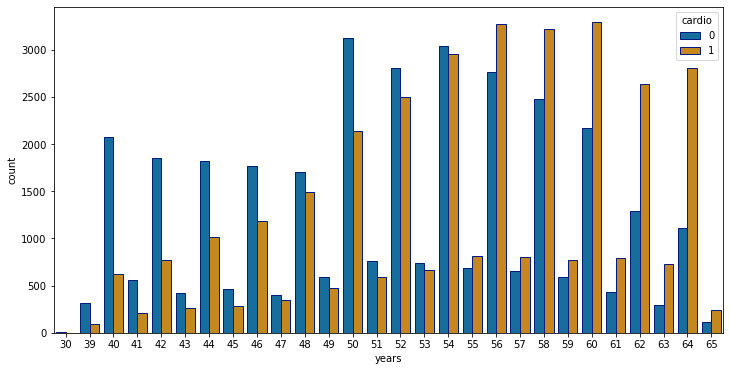

In [18]:
plt.figure(figsize=(12,6))
df['years'] = ( df['age'] / 365).round(0)   
df["years"] = pd.to_numeric(df["years"],downcast='integer') 
sns.countplot(x='years', hue='cardio', data = df, palette="colorblind", edgecolor=sns.color_palette("dark", n_colors = 1));

On peut voir que les risques d'avoir une maladie cardio-vasculaire sont plus important aprés 55 ans, avant 55 ans , plus on est jeune , moins les risques sont importants .L'âge est un facteur trés important.

In [30]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


<AxesSubplot:>

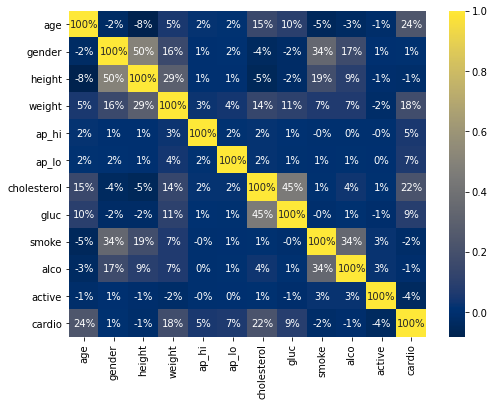

In [70]:
#Visualisation de la correlation
df.corr()
plt.figure(figsize=(8,6))  
sns.heatmap(df.corr(),cmap = 'cividis', annot=True, fmt='.0%')

# Préparation des données

## Evaluation de l'importance des différentes variables du dataset 

Afin de quantifier l'utilité de toutes les variables dans toute la forêt aléatoire, nous pouvons regarder les importances relatives des variables. Les importances renvoyées dans Skicit-learn représentent à quel point l'inclusion d'une variable particulière améliore la prédiction. Nous evaluerons les variables sur l'année 2019.

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(df.drop('cardio', axis=1), df['cardio'], test_size =0.3, random_state=2019)

In [72]:
rf = RandomForestClassifier(n_estimators=100, random_state=2019)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_valid)
from sklearn.metrics import accuracy_score
print("Le score de précision est de {:<6.2f}".format(accuracy_score(y_valid, y_pred)),"%")

Le score de précision est de 0.72   %


Feature ranking:
1 age 0.3062576606097183
2 weight 0.17365485187064147
3 ap_hi 0.17140090916033016
4 height 0.15482192177844792
5 ap_lo 0.09129114421301521
6 cholesterol 0.04014111172468464
7 gluc 0.017200286456063
8 gender 0.016268097358439267
9 active 0.012558712395089135
10 smoke 0.008680266460330413
11 alco 0.007725037973240669


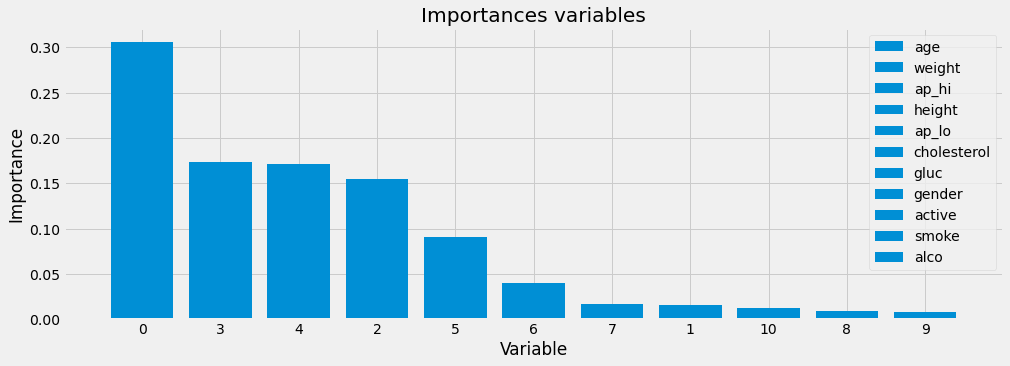

In [82]:
importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]

num_to_plot = max(10, len(df.columns[:-1]))
feature_indices = [ind for ind in indices[:num_to_plot]]
print("Feature ranking:")




for f in range(num_to_plot):
    print(f+1, features[feature_indices[f]], importances[indices[f]])

plt.figure(figsize=(15,5))

plt.style.use ('fivethirtyeight')
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features[i]) for i in feature_indices]);
plt.ylabel ('Importance'); plt.xlabel ('Variable'),plt.title ('Importances variables');

La variables qui a le plus d'influence sur le risque d'être atteint d'une maladie cardio-vasculaire est l'âge.
La différence entre l'âge et les autres variables est importante, nous pouvons donc conclure que l'exclusion de l'une de ces caractéristiques entraînera une réduction de la précision du modèle. Mais etant donné que nous sommes dans le domaine médicale nous ne supprimeront aucune variable.

## Calcul du score de précision avec Random Forest et StandardScaler

In [110]:
data = pd.read_csv('cardio_train.csv', sep=';')
df = data.copy()
df = df.drop('id', axis=1)

In [111]:
#On divise les données entre les X et les Y
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.25, random_state = 42)

Nous divisons le dataset en un ensemble de données d'entraînement à 75% et un ensemble de test à 25%.

In [113]:
#Mise à l'échelle des valeurs pour être entre 0 et 1 inclus
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Création du modèle d'apprentissage 

In [114]:
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [115]:
model = forest
model.score(X_train, Y_train)
print("le modèle est précis à environ  {:<4.2f}".format(model.score(X_train, Y_train)),"% sur les données d'entraînement" )

le modèle est précis à environ  0.98 % sur les données d'entraînement


In [116]:
#On teste la précision des modèles sur l'ensemble des données test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, model.predict(X_test))
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
#Impréssion de la matrice de confusion
print(cm)
#Print the models accuracy on the test data
print('Le modèle est précis à environ {:<4.2f}'. format( (TP + TN)/ (TP +TN + FN + FP)),"% sur les données test." )


[[6432 2256]
 [3014 5798]]
Le modèle est précis à environ 0.70 % sur les données test.


## Amélioration avec les meilleurs paramètres 

In [133]:
data = pd.read_csv('cardio_train.csv', sep=';')
df = data.copy()
df = df.drop('id', axis=1)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size= 0.25, random_state = 42)

In [135]:
# Création de la grille des paramètres 

param_grid = {
    'bootstrap': [True, False],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 25, 50, 75, 100]
}

In [ ]:
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  6.8min


In [ ]:
print(grid_search.best_params_)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
forest = RandomForestClassifier(bootstrap = True, n_estimators = 100, max_features = 2, min_samples_leaf=5, min_samples_split=10,random_state = 42)
forest.fit(X_train, y_train)

forest2 = RandomForestClassifier(bootstrap = True, n_estimators = 100, max_features = 2, min_samples_leaf=5, min_samples_split=10, random_state = 42)
forest2.fit(X_train2, y_train2)

In [ ]:
model = forest
model.score(X_train, y_train)

In [ ]:
rfscore= model.score(X_train, y_train)

In [ ]:
model2 = forest2
model2.score(X_train2, y_train2)

In [ ]:
print("r2_score : " , r2_score(y_test, model.predict(X_test)))
print("accuracy : " , accuracy_score(y_test, model.predict(X_test)))
print("classification report : ")
print(classification_report(y_test, model.predict(X_test)))
rfr2 = r2_score(y_test, model.predict(X_test))
rfacc = accuracy_score(y_test, model.predict(X_test))

In [ ]:
print("r2_score : " , r2_score(y_test2, model2.predict(X_test2)))
print("accuracy : " , accuracy_score(y_test2, model2.predict(X_test2)))
print("classification report : ")
print(classification_report(y_test2, model2.predict(X_test2)))

# Prédiction pour arthur

Prédire si Arthur 53 ans, fumeur, sportif, 175 cm, 85 kg, 
avec un taux de cholestérol au dessus de la normal et un taux de glucose normal, 
une tension artérielle systolique dans la moyenne et une pression sanguine diastolique 
correspondant à la moyenne du 3e quartile (50%-75%) du jeu de données, 
est un sujet à risques cardio-vasculaires.
Nous n'avons pas de précision sur sa consommation d'alcool , nous evaluerons avec consommation et sans consommation d'alcool.

### Calcul de la pression sanguine diastolique

In [ ]:
pression = round(np.percentile(df["ap_lo"], 75))
print(pression)

tension = data["ap_hi"].mean()
tension

In [ ]:
arthur_ssalcool = [[52*365, 2, 175, 85.0, 128, 90 ,2, 1, 1, 0, 1]]
arthur_ssalcool = sc.transform(arthur_ssalcool)
arthur_ssalcool = model.predict(arthur_ssalcool)
proba_arthurmalade = model.predict_proba(arthur_ssalcool)
print("Arthur a une probabilité de ",proba_arthurmalade, "% d'avoir une maladie Cardio-vasculaire.")
